<a href="https://colab.research.google.com/github/Mrunali95/Thesis/blob/master/Multivariate_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
## Download data of US Dollar Index

dfUSD = web.DataReader('DX-Y.NYB', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfUSD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-01,93.309998,93.080002,93.190002,93.209999,0.0,93.209999
1990-01-02,94.309998,93.080002,93.129997,94.290001,0.0,94.290001
1990-01-03,94.519997,94.080002,94.150002,94.419998,0.0,94.419998
1990-01-04,93.879997,92.389999,93.720001,92.519997,0.0,92.519997
1990-01-05,93.419998,92.550003,93.339996,92.849998,0.0,92.849998


In [3]:
## download data of NASDAQ index

dfnasdaq = web.DataReader('^IXIC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,459.299988,452.700012,452.899994,459.299988,110720000,459.299988
1990-01-03,461.600006,460.000000,461.100006,460.899994,152660000,460.899994
1990-01-04,460.799988,456.899994,460.399994,459.399994,147950000,459.399994
1990-01-05,459.399994,457.799988,457.899994,458.200012,137230000,458.200012
1990-01-08,458.700012,456.500000,457.100006,458.700012,115500000,458.700012


In [4]:
## download data of Dow Jones Industrial Average index

dfdaia = web.DataReader('^DJI', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfdaia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2811.649902,2732.510010,2748.719971,2810.149902,20680000,2810.149902
1990-01-03,2834.040039,2786.260010,2814.199951,2809.729980,23620000,2809.729980
1990-01-04,2821.459961,2766.419922,2804.389893,2796.080078,24370000,2796.080078
1990-01-05,2810.149902,2758.110107,2786.899902,2773.250000,20290000,2773.250000
1990-01-08,2803.969971,2753.409912,2761.729980,2794.370117,16610000,2794.370117


In [5]:
## download data of S&P 500 index

dfsp = web.DataReader('^GSPC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfsp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,359.690002,351.980011,353.399994,359.690002,162070000,359.690002
1990-01-03,360.589996,357.890015,359.690002,358.760010,192330000,358.760010
1990-01-04,358.760010,352.890015,358.760010,355.670013,177000000,355.670013
1990-01-05,355.670013,351.350006,355.670013,352.200012,158530000,352.200012
1990-01-08,354.239990,350.540009,352.200012,353.790009,140110000,353.790009


In [6]:
## download data of NYSE index

dfnyse = web.DataReader('^NYA', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnyse.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2093.600098,2093.600098,2093.600098,2093.600098,0,2093.600098
1990-01-03,2091.479980,2091.479980,2091.479980,2091.479980,0,2091.479980
1990-01-04,2075.520020,2075.520020,2075.520020,2075.520020,0,2075.520020
1990-01-05,2058.070068,2058.070068,2058.070068,2058.070068,0,2058.070068
1990-01-08,2065.370117,2065.370117,2065.370117,2065.370117,0,2065.370117


In [7]:
newdfUSD = dfUSD[(dfUSD.index).isin(dfnasdaq.index)]


In [8]:
absent = dfdaia[~(dfdaia.index).isin(newdfUSD.index)]

In [9]:
newdfnasdaq = dfnasdaq[~(dfnasdaq.index).isin(absent.index)]
newdfdaia = dfdaia[~(dfdaia.index).isin(absent.index)]
newdfnyse = dfnyse[~(dfnyse.index).isin(absent.index)]
newdfsp = dfsp[~(dfsp.index).isin(absent.index)]

In [10]:
finaldata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

finaldata['USD'] = newdfUSD['Close']
finaldata['NASDAQ'] = newdfnasdaq['Close']
finaldata['DJAI'] = newdfdaia['Close']
finaldata['NYSE'] = newdfnyse['Close']
finaldata['S&P'] = newdfsp['Close']

finaldata.head()

,USD,NASDAQ,DJAI,NYSE,S&P
Date,,,,,
1990-01-02,94.290001,459.299988,2810.149902,2093.600098,359.690002
1990-01-03,94.419998,460.899994,2809.729980,2091.479980,358.760010
1990-01-04,92.519997,459.399994,2796.080078,2075.520020,355.670013
1990-01-05,92.849998,458.200012,2773.250000,2058.070068,352.200012
1990-01-08,92.050003,458.700012,2794.370117,2065.370117,353.790009


In [13]:
train_data= finaldata[0:int(len(finaldata)*0.8)]
test_data = finaldata[int(len(finaldata)*0.8):]

train_data = np.log(train_data)

In [14]:
print(len(train_data))
print(len(test_data))

6020
1506


In [16]:
trainusd = train_data['USD']
trainexog = train_data.drop(['USD'], axis=1)

testusd = test_data['USD']
testexog = test_data.drop(['USD'], axis=1)

In [17]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(trainusd, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -1.681401
p-value                           0.440720
#Lags Used                        0.000000
Number of Observations Used    6019.000000
Critical Value (1%)              -3.431437
Critical Value (5%)              -2.862020
Critical Value (10%)             -2.567026
dtype: float64


In [18]:
  ## Applying time shifting, we subtract every the point by the one that preceded it to make data stationary
  df2 = trainusd - trainusd.shift(273)
  df2.dropna(inplace=True)
  trainusd_stationary = df2

In [19]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(trainusd_stationary, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -4.219763
p-value                           0.000610
#Lags Used                       28.000000
Number of Observations Used    5718.000000
Critical Value (1%)              -3.431494
Critical Value (5%)              -2.862046
Critical Value (10%)             -2.567039
dtype: float64


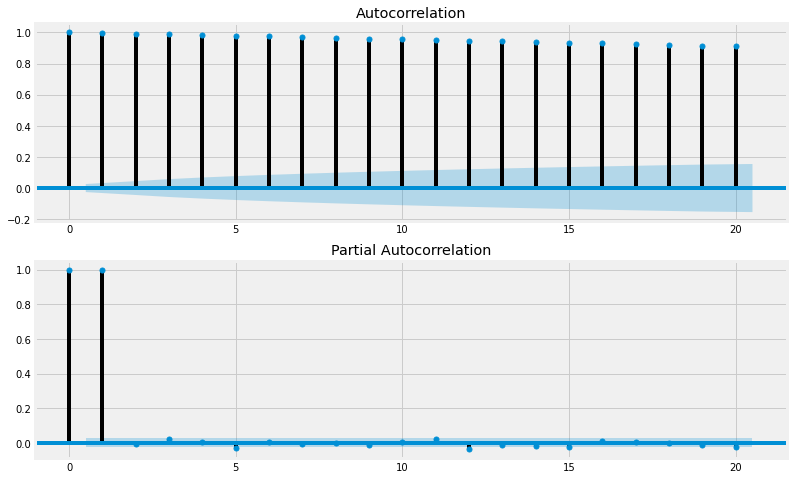

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import statsmodels.api as sm
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trainusd_stationary, lags = 20, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trainusd_stationary, lags = 20, ax = ax2)
pyplot.show()

In [35]:
def norm(X):
  normdata = (X - min(X))/(max(X) - min(X))
  return normdata

normexog = pd.DataFrame(columns=trainexog.columns, index=trainexog.index)

normusd = norm(trainusd_stationary) 

for i in trainexog.columns:
  normexog[i] = norm(trainexog[i])

In [50]:
normtestexog = pd.DataFrame(columns=testexog.columns, index=testexog.index)

for i in testexog.columns:
  normtestexog[i] = norm(testexog[i])

In [37]:
exogtra = normexog[(normexog.index).isin(normusd.index)]

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(normusd,order=(1,1,1),seasonal_order=(1,1,1,12),exog = exogtra)
#model = SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()  
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                USD   No. Observations:                 5747
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14908.824
Date:                            Sun, 05 Jul 2020   AIC                         -29799.648
Time:                                    10:51:38   BIC                         -29739.761
Sample:                                         0   HQIC                        -29778.804
                                           - 5747                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NASDAQ        -0.2773      0.098     -2.820      0.005      -0.470      -0.085
DJAI           0.7630      0.149   

In [51]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# invert the differenced forecast to something usable
forecast = model_fit.predict(start = len(normusd), end= len(normusd)+len(testusd)-1, exog=normtestexog)

history = [x for x in normusd]
pred = []
days_in_year = 273
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	pred.append(inverted)
	history.append(inverted)
	day += 1


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [56]:
forecast.index = testusd.index

In [53]:
pred = np.exp(pred)
output = pd.DataFrame(columns=['test','pred'])
output['test'] = norm(testusd)
output['pred'] = pred

output

,test,pred
Date,,
2013-12-17,0.038095,1.934078
2013-12-18,0.040166,1.825324
2013-12-19,0.061698,1.892906
2013-12-20,0.059627,1.863419
2013-12-23,0.054244,1.868829
...,...,...
2019-12-23,0.767702,7.637372
2019-12-26,0.763975,8.281797
2019-12-27,0.736232,8.523515


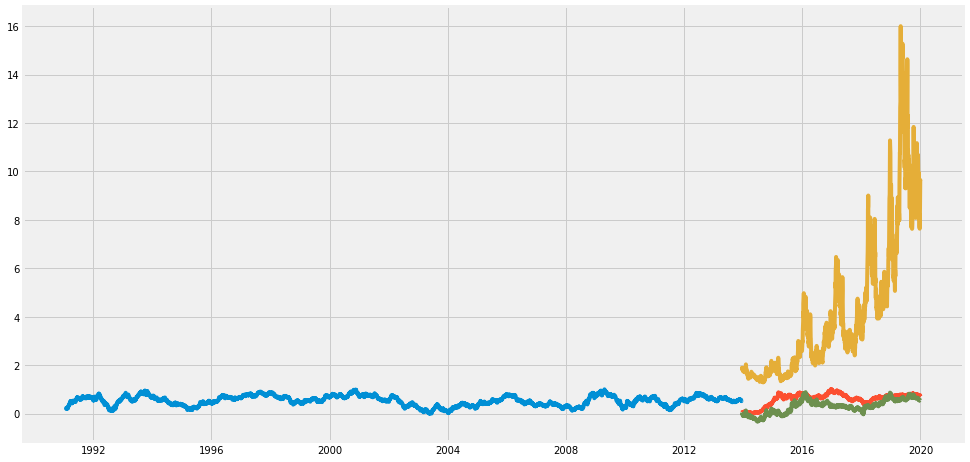

In [58]:
plt.figure(figsize=(15,8))
plt.plot(normusd)
plt.plot(output['test'])
plt.plot(output['pred'])
plt.plot(forecast)